In [4]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load dataset Pokemon.csv
data = pd.read_csv('Pokemon.csv')

# Lihat DataFrame Pokemon
data


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [51]:
# Lihat info dataset Pokemon
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Pokemon Terkuat:
Nama: MewtwoMega Mewtwo X
Total: 780

Pokemon Terlemah:
Nama: Sunkern
Total: 180



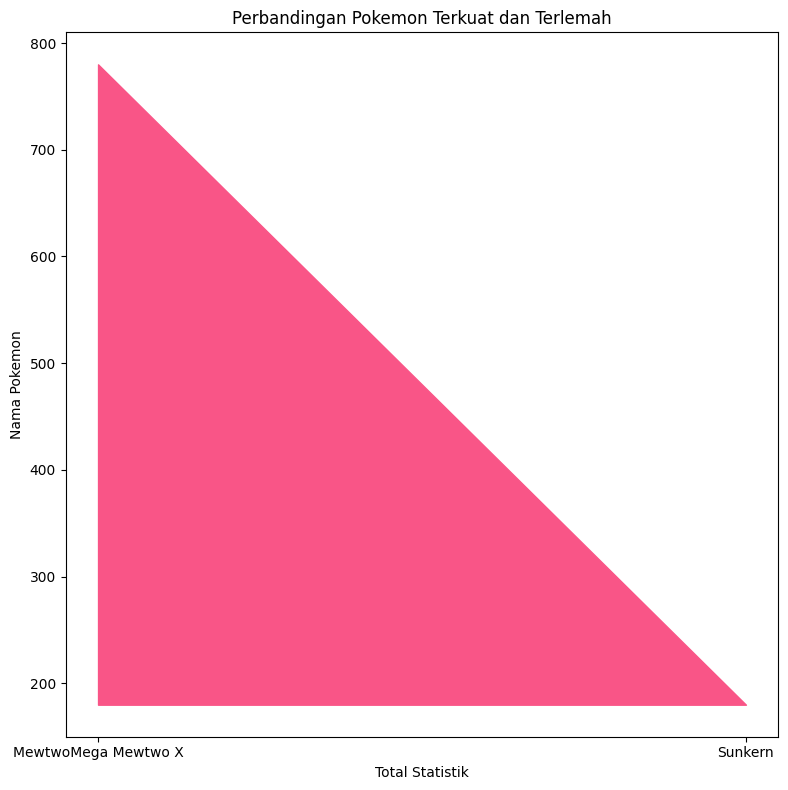

In [175]:
# Temukan Pokemon terkuat dan terlemah
pokemon_terkuat = data.loc[data['Total'].idxmax()]
pokemon_terlemah = data.loc[data['Total'].idxmin()]

# Cetak informasi Pokemon terkuat dan terlemah
pokemon_data = {
    "Pokemon Terkuat": pokemon_terkuat,
    "Pokemon Terlemah": pokemon_terlemah
}
for label, pokemon in pokemon_data.items():
    print(f"{label}:")
    print(f"Nama: {pokemon['Name']}")
    print(f"Total: {pokemon['Total']}")
    print()

# Visualisasi data dengan area chart
plt.figure(figsize=(8, 8))
plt.fill_betweenx([pokemon_terkuat['Total'], pokemon_terlemah['Total']],
 [pokemon_terkuat['Name'], pokemon_terlemah['Name']], color='#F95587')
plt.ylabel('Nama Pokemon')
plt.xlabel('Total Statistik')
plt.title('Perbandingan Pokemon Terkuat dan Terlemah')
plt.tight_layout()
plt.show()


Pokemon Terkuat:
Nama: MewtwoMega Mewtwo X
Total: 780

Pikachu:
Nama: Pikachu
Total: 320

Pokemon Terlemah:
Nama: Sunkern
Total: 180



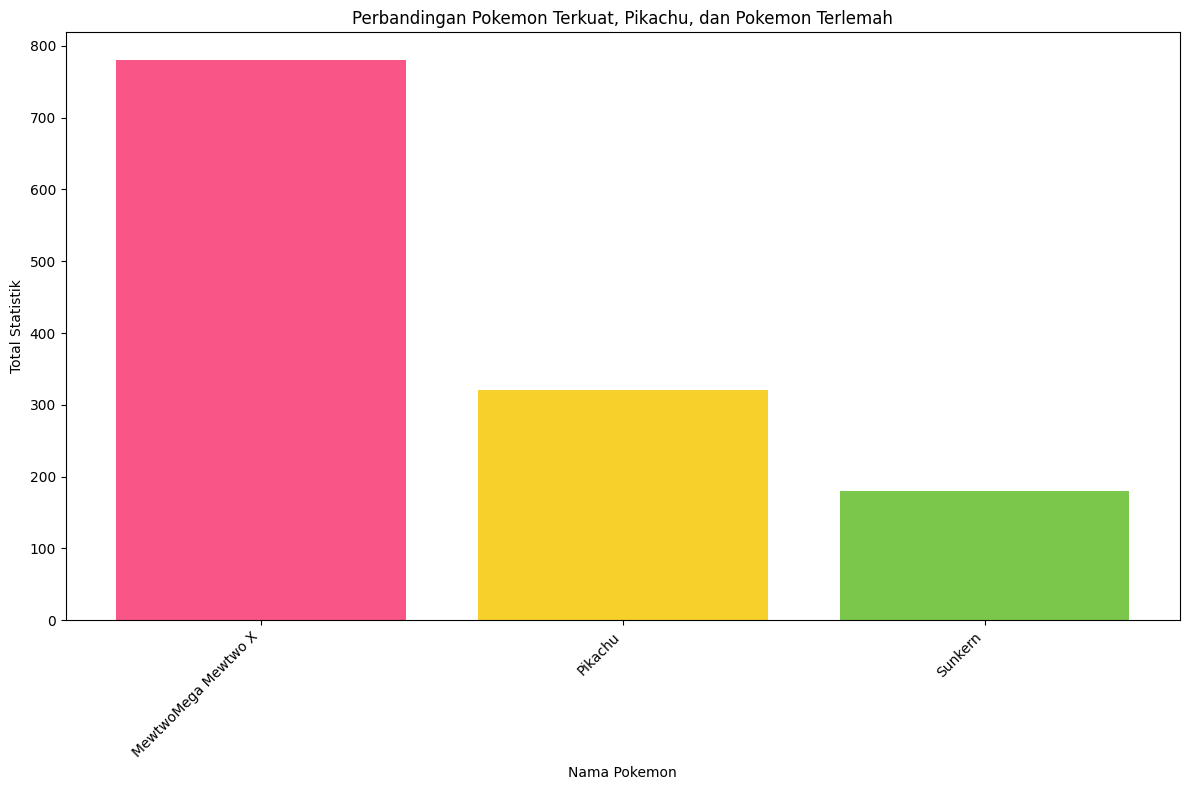

In [8]:
# Temukan Pokemon terkuat dan terlemah
pokemon_terkuat = data.loc[data['Total'].idxmax()]
pokemon_terlemah = data.loc[data['Total'].idxmin()]

# Data Pikachu beserta konversi datanya
pikachu_data = {'Name': 'Pikachu', 'Total': 320}
pikachu_series = pd.Series(pikachu_data)

# Cetak informasi Pokemon terkuat, pikachu, dan terlemah
pokemon_data = {
    "Pokemon Terkuat": pokemon_terkuat,
    "Pikachu": pikachu_series,
    "Pokemon Terlemah": pokemon_terlemah
}
for label, pokemon in pokemon_data.items():
    print(f"{label}:")
    print(f"Nama: {pokemon['Name']}")
    print(f"Total: {pokemon['Total']}")
    print()

# Gabungan data Pokemon terkuat, terlemah, dan Pikachu
pokemon_list = [pokemon_terkuat, pikachu_series, pokemon_terlemah]
pokemon_df = pd.DataFrame(pokemon_list)

# Urutkan berdasarkan Total
pokemon_df_sorted = pokemon_df.sort_values(by='Total', ascending=False)

# Visualisasi data dengan bar chart
plt.figure(figsize=(12, 8))
plt.bar(pokemon_df_sorted['Name'], pokemon_df_sorted['Total'], color=['#F95587', '#F7D02C', '#7AC74C'])
plt.xlabel('Nama Pokemon')
plt.ylabel('Total Statistik')
plt.title('Perbandingan Pokemon Terkuat, Pikachu, dan Pokemon Terlemah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Type: Water, Jumlah Pokemon: 126

Type: Normal, Jumlah Pokemon: 102

Type: Flying, Jumlah Pokemon: 101

Type: Grass, Jumlah Pokemon: 95

Type: Psychic, Jumlah Pokemon: 90



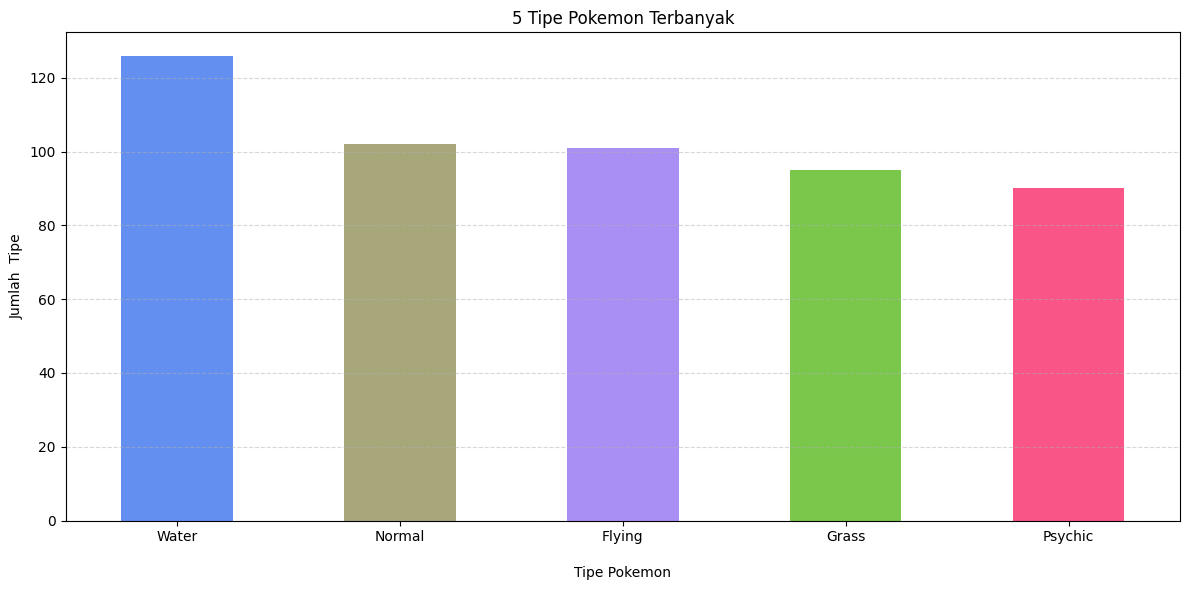

In [137]:
# Hitung jumlah setiap tipe Pokemon (Type 1 dan Type 2)
type_1_count = data['Type 1'].value_counts()
type_2_count = data['Type 2'].value_counts().fillna(0)

# Gabungkan data tipe 1 dan tipe 2
type_count = type_1_count.add(type_2_count)

# Urutkan tipe berdasarkan jumlah tipe
type_count_sort = type_count.sort_values(ascending=False)

# Ambil 5 tipe Pokemon
top_5_type = type_count_sort.head(5)

# Cetak informasi jumlah tipePokemon
for type, jumlah in top_5_type.items():
  print(f"Type: {type}, Jumlah Pokemon: {jumlah}")
  print()

# Visualisasi data dengan bar chart
plt.figure(figsize=(12, 6))
top_5_type.plot(kind='bar', color=['#6390F0', '#A8A77A', '#A98FF3', '#7AC74C', '#F95587'])
plt.xlabel('\nTipe Pokemon')
plt.ylabel('Jumlah  Tipe')
plt.title('5 Tipe Pokemon Terbanyak')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


Pokemon terkuat tipe Water: KyogrePrimal Kyogre dengan total kekuatan 770

Pokemon terkuat tipe Normal: Arceus dengan total kekuatan 720

Pokemon terkuat tipe Flying: TornadusIncarnate Forme dengan total kekuatan 580

Pokemon terkuat tipe Grass: SceptileMega Sceptile dengan total kekuatan 630

Pokemon terkuat tipe Psychic: MewtwoMega Mewtwo X dengan total kekuatan 780



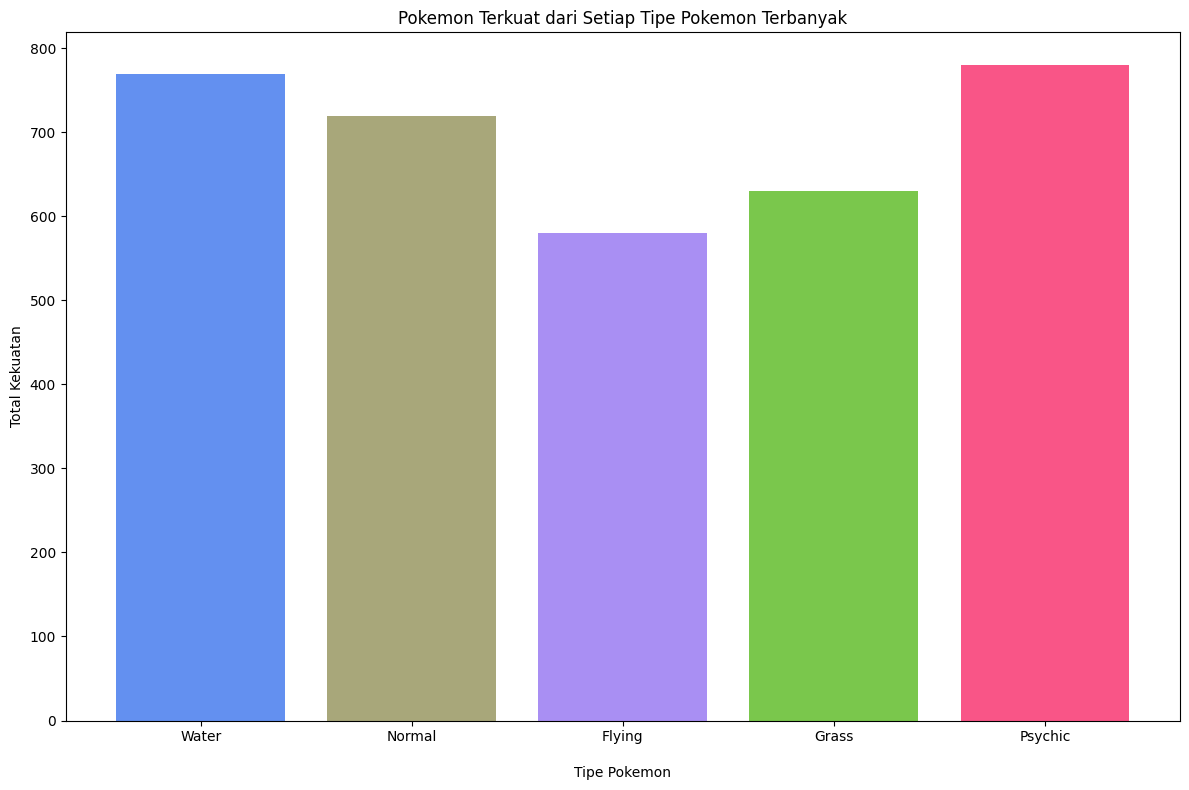

In [139]:
# Definisikan tipe yang ingin dicari
tipe_list = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic']

# List untuk menyimpan data Pokemon terkuat tiap tipe
strongest_pokemon_data = []

# Loop melalui setiap tipe
for tipe in tipe_list:
    # Filter data untuk tipe yang dipilih
    pokemon_tipe = data[data['Type 1'] == tipe]

    # Urutkan Pokemon berdasarkan total kekuatan (Total) secara menurun
    pokemon_tipe_terkuat = pokemon_tipe.sort_values('Total', ascending=False)

    # Ambil Pokemon terkuat dari tipe tersebut
    pokemon_terkuat = pokemon_tipe_terkuat.iloc[0]

    # Tambahkan data Pokemon terkuat ke list
    strongest_pokemon_data.append({
        'Type': tipe,
        'Name': pokemon_terkuat['Name'],
        'Total': pokemon_terkuat['Total']
    })

# Buat DataFrame dari data Pokemon terkuat
strongest_pokemon_df = pd.DataFrame(strongest_pokemon_data)

# Cetak nilai total kekuatan menggunakan loop for
for index, row in strongest_pokemon_df.iterrows():
    print(f"Pokemon terkuat tipe {row['Type']}: {row['Name']} dengan total kekuatan {row['Total']}")
    print()

# Visualisasi data dengan bar chart
plt.figure(figsize=(12, 8))
plt.bar(strongest_pokemon_df['Type'], strongest_pokemon_df['Total'], color=['#6390F0', '#A8A77A', '#A98FF3', '#7AC74C', '#F95587'])
plt.xlabel('\nTipe Pokemon')
plt.ylabel('Total Kekuatan')
plt.title('Pokemon Terkuat dari Setiap Tipe Pokemon Terbanyak')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Pokemon terkuat tipe Grass: SceptileMega Sceptile dengan total kekuatan 630

Pokemon terkuat tipe Fire: Ho-oh dengan total kekuatan 680

Pokemon terkuat tipe Water: KyogrePrimal Kyogre dengan total kekuatan 770

Pokemon terkuat tipe Bug: HeracrossMega Heracross dengan total kekuatan 600

Pokemon terkuat tipe Normal: Arceus dengan total kekuatan 720

Pokemon terkuat tipe Poison: Crobat dengan total kekuatan 535

Pokemon terkuat tipe Electric: AmpharosMega Ampharos dengan total kekuatan 610

Pokemon terkuat tipe Ground: GroudonPrimal Groudon dengan total kekuatan 770

Pokemon terkuat tipe Fairy: Xerneas dengan total kekuatan 680

Pokemon terkuat tipe Fighting: LucarioMega Lucario dengan total kekuatan 625

Pokemon terkuat tipe Psychic: MewtwoMega Mewtwo X dengan total kekuatan 780

Pokemon terkuat tipe Rock: DiancieMega Diancie dengan total kekuatan 700

Pokemon terkuat tipe Ghost: GiratinaOrigin Forme dengan total kekuatan 680

Pokemon terkuat tipe Ice: Regice dengan total kekuatan 580


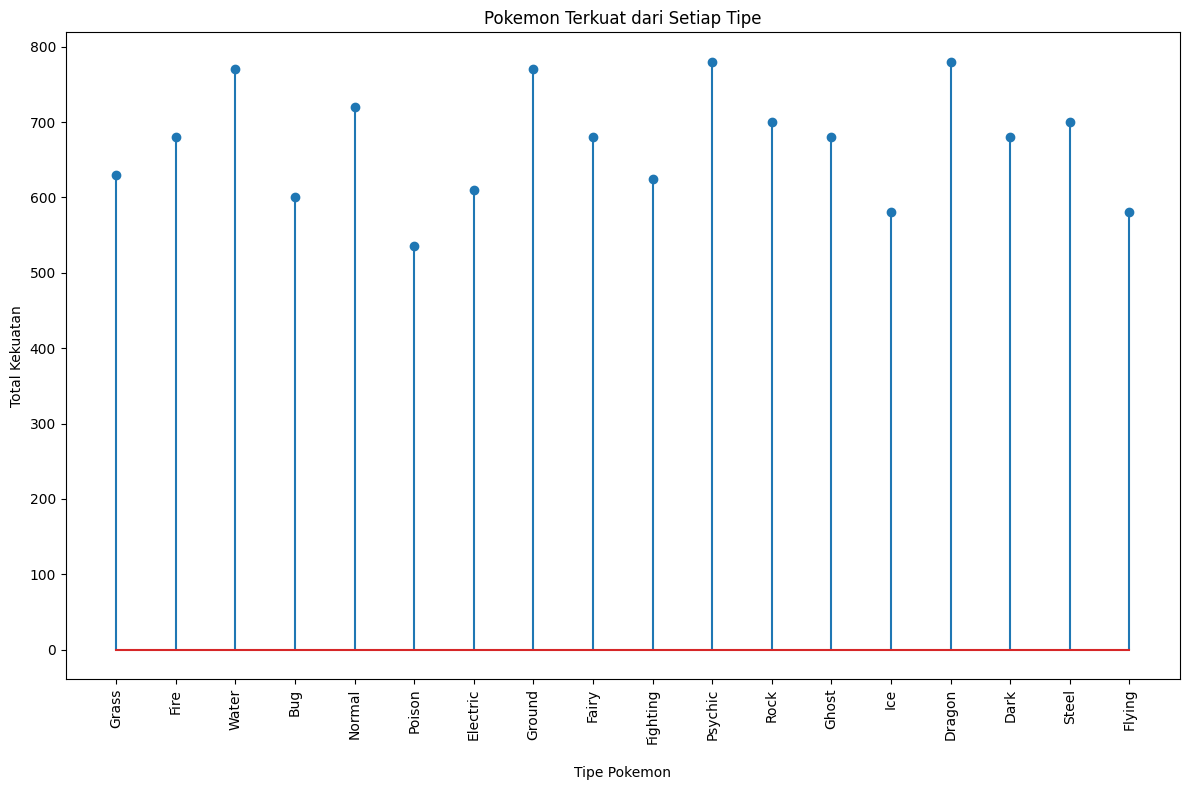

In [142]:
# Definisikan tipe yang ingin dicari
tipe_list = data['Type 1'].unique()

# List untuk menyimpan data Pokemon terkuat tiap tipe
strongest_pokemon_data = []

# Loop melalui setiap tipe
for tipe in tipe_list:
    # Filter data untuk tipe yang dipilih
    pokemon_tipe = data[data['Type 1'] == tipe]

    # Urutkan Pokemon berdasarkan total kekuatan (Total) secara menurun
    pokemon_tipe_terkuat = pokemon_tipe.sort_values('Total', ascending=False)

    # Ambil Pokemon terkuat dari tipe tersebut
    pokemon_terkuat = pokemon_tipe_terkuat.iloc[0]

    # Tambahkan data Pokemon terkuat ke list
    strongest_pokemon_data.append({
        'Type': tipe,
        'Name': pokemon_terkuat['Name'],
        'Total': pokemon_terkuat['Total']
    })

# Buat DataFrame dari data Pokemon terkuat
strongest_pokemon_df = pd.DataFrame(strongest_pokemon_data)

# Cetak nilai total kekuatan menggunakan loop for
for index, row in strongest_pokemon_df.iterrows():
    print(f"Pokemon terkuat tipe {row['Type']}: {row['Name']} dengan total kekuatan {row['Total']}")
    print()

# Visualisasi data dengan lollipop chart
plt.figure(figsize=(12, 8))
plt.stem(strongest_pokemon_df['Type'], strongest_pokemon_df['Total'], linefmt='C0-', markerfmt='C0o')
plt.xlabel('\nTipe Pokemon')
plt.ylabel('Total Kekuatan')
plt.title('Pokemon Terkuat dari Setiap Tipe')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Jumlah Pokemon Tiap Generasi

Pada Generasi 1, ada: 166 Pokemon

Pada Generasi 2, ada: 106 Pokemon

Pada Generasi 3, ada: 160 Pokemon

Pada Generasi 4, ada: 121 Pokemon

Pada Generasi 5, ada: 165 Pokemon

Pada Generasi 6, ada: 82 Pokemon



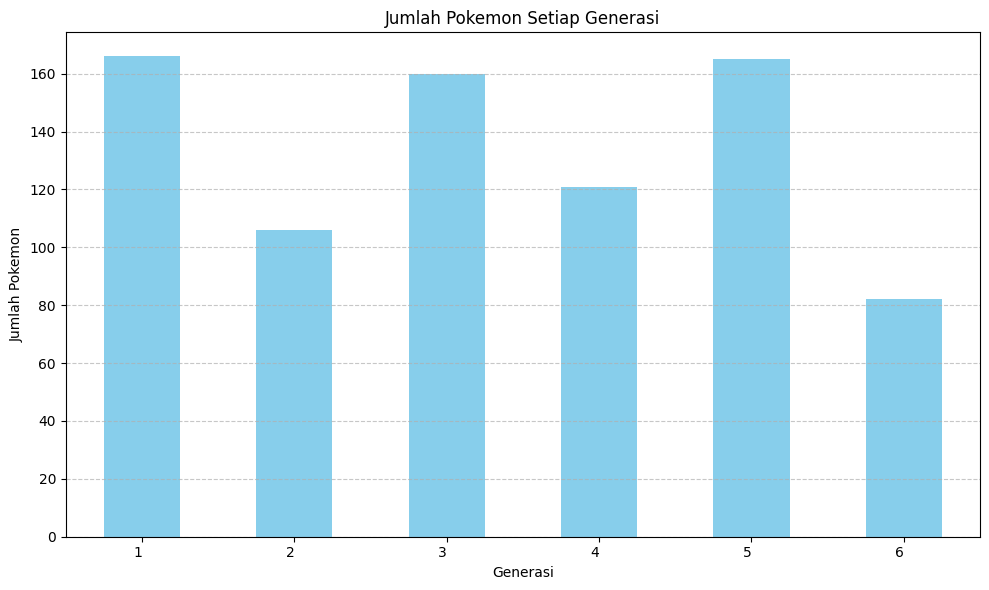

In [143]:
# Calculate the count of Pokemon per generation
count_per_generation = data['Generation'].value_counts()

# Sort the generations in ascending order
sorted_generations = sorted(count_per_generation.index)

# Create a new Series with sorted generations
sorted_counts = pd.Series({gen: count_per_generation[gen] for gen in sorted_generations})

print("Jumlah Pokemon Tiap Generasi\n")

# Iterate over generations in order
for generation in range(1, 7):
    # Filter data for the current generation
    generation_data = data[data['Generation'] == generation]

    # Count the number of Pokemon in the generation
    count = len(generation_data)

    # Print the count
    print(f"Pada Generasi {generation}, ada: {count} Pokemon")
    print()

# Visualize the data
plt.figure(figsize=(10, 6))
sorted_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Generasi')
plt.ylabel('Jumlah Pokemon')
plt.title('Jumlah Pokemon Setiap Generasi')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Generation: 1, Number of Legendary Pokemon: 6

Generation: 2, Number of Legendary Pokemon: 5

Generation: 3, Number of Legendary Pokemon: 18

Generation: 4, Number of Legendary Pokemon: 13

Generation: 5, Number of Legendary Pokemon: 15

Generation: 6, Number of Legendary Pokemon: 8



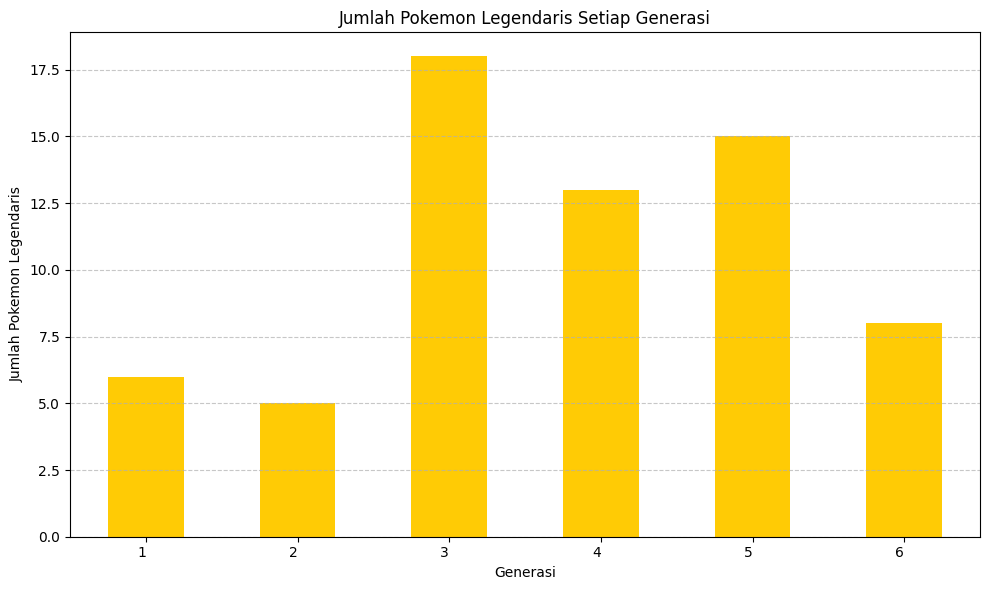

In [144]:
# Hitung jumlah Pokemon legendaris per generasi
legendary_per_gen = data[data['Legendary'] == True].groupby('Generation')['Name'].count()

# Filter for Legendary Pokemon
legendary_pokemon = data[data['Legendary'] == True]

# Group Legendary Pokemon by Generation and count
legendary_count_by_generation = legendary_pokemon.groupby('Generation')['Name'].count()

# Print the count of Legendary Pokemon for each generation
for generation, count in legendary_count_by_generation.items():
    print(f"Generation: {generation}, Number of Legendary Pokemon: {count}")
    print()

# Buat bar chart
plt.figure(figsize=(10, 6))
legendary_per_gen.plot(kind='bar', color=['#ffcb05'])
plt.xlabel('Generasi')
plt.ylabel('Jumlah Pokemon Legendaris')
plt.title('Jumlah Pokemon Legendaris Setiap Generasi')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Generation: 1, Average Strength: 426.81

Generation: 2, Average Strength: 418.28

Generation: 3, Average Strength: 436.23

Generation: 4, Average Strength: 459.02

Generation: 5, Average Strength: 434.99

Generation: 6, Average Strength: 436.38



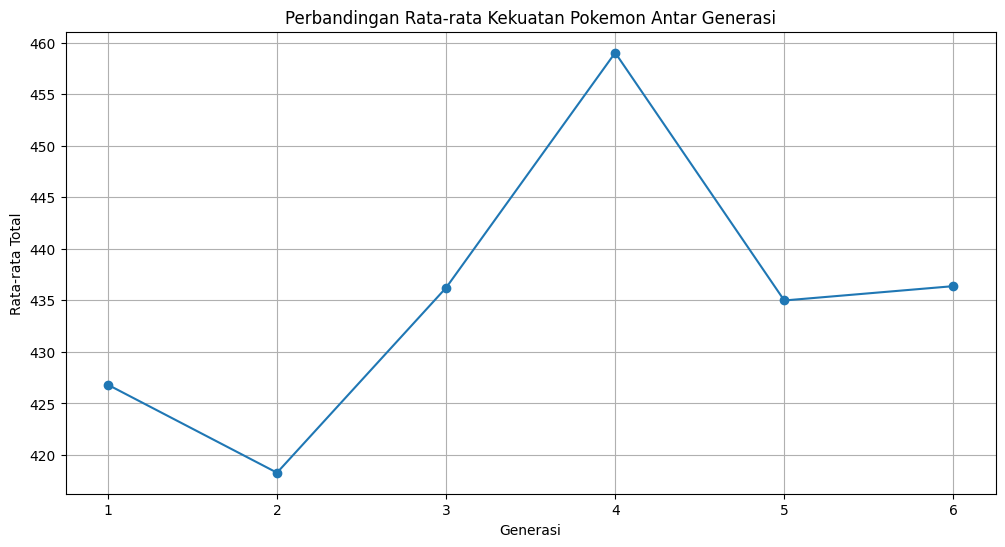

In [79]:
# Kelompokkan data berdasarkan generasi
generasi_data = data.groupby('Generation').mean(numeric_only=True)

# Pilih statistik yang ingin dianalisis (HP, Attack, Defense, dll.)
statistik_pilihan = ['Total']

# Group Pokemon by Generation and calculate mean Total stats
average_strength_by_generation = data.groupby('Generation')['Total'].mean()

# Print the average strength for each generation
for generation, average_strength in average_strength_by_generation.items():
    print(f"Generation: {generation}, Average Strength: {average_strength:.2f}")
    print()

# Buat line chart untuk setiap statistik
for stat in statistik_pilihan:
    plt.figure(figsize=(12, 6))
    plt.plot(generasi_data.index, generasi_data[stat], marker='o', linestyle='-')
    plt.xlabel('Generasi')
    plt.ylabel('Rata-rata Total')
    plt.title(f'Perbandingan Rata-rata Kekuatan Pokemon Antar Generasi')
    plt.grid(True)

    plt.show()


Tipe: Legendaris, Rata-rata Kekuatan: 637.38

Tipe: Non-Legendaris, Rata-rata Kekuatan: 417.21





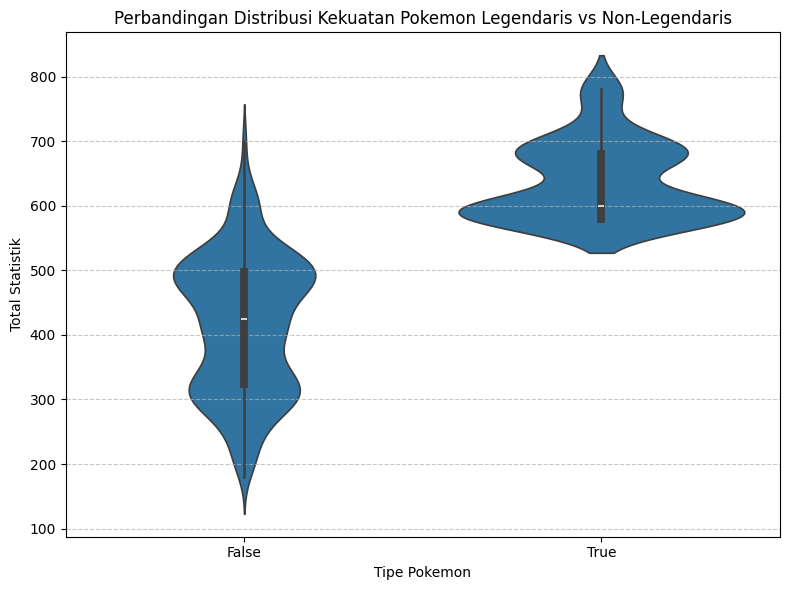

In [35]:
# Hitung total statistik untuk setiap Pokemon
data['Total'] = data[['Total']].sum(axis=1)

# Pisahkan data Pokemon legendaris dan non-legendaris
legendaris = data[data['Legendary'] == True]
non_legendaris = data[data['Legendary'] == False]

# Perbandingan total statistik
total_legendaris = legendaris['Total'].mean()
total_nonlegendaris = non_legendaris['Total'].mean()

# Buat dictionary untuk menyimpan data
perbandingan = {
    "Legendaris": total_legendaris,
    "Non-Legendaris": total_nonlegendaris
}

# Loop melalui dictionary dan cetak informasi
for tipe, kekuatan in perbandingan.items():
    print(f"Tipe: {tipe}, Rata-rata Kekuatan: {kekuatan:.2f}")
    print()

# Buat violin plot
print("\n")
plt.figure(figsize=(8, 6))
sns.violinplot(x='Legendary', y='Total', data=data)
plt.xlabel('Tipe Pokemon')
plt.ylabel('Total Statistik')
plt.title('Perbandingan Distribusi Kekuatan Pokemon Legendaris vs Non-Legendaris')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Informasi Pokemon Non-Legendaris Terkuat:**
                   Name Type 1  Total
MetagrossMega Metagross  Steel    700

**Informasi Pokemon Legendaris yang Lebih Lemah:**
                    Name   Type 1  Total
                Articuno      Ice    580
                  Zapdos Electric    580
                 Moltres     Fire    580
                  Mewtwo  Psychic    680
                  Raikou Electric    580
                   Entei     Fire    580
                 Suicune    Water    580
                   Lugia  Psychic    680
                   Ho-oh     Fire    680
                Regirock     Rock    580
                  Regice      Ice    580
               Registeel    Steel    580
                  Latias   Dragon    600
                  Latios   Dragon    600
                  Kyogre    Water    670
                 Groudon   Ground    670
                Rayquaza   Dragon    680
                 Jirachi    Steel    600
      DeoxysNormal Forme  Psychic    600
     

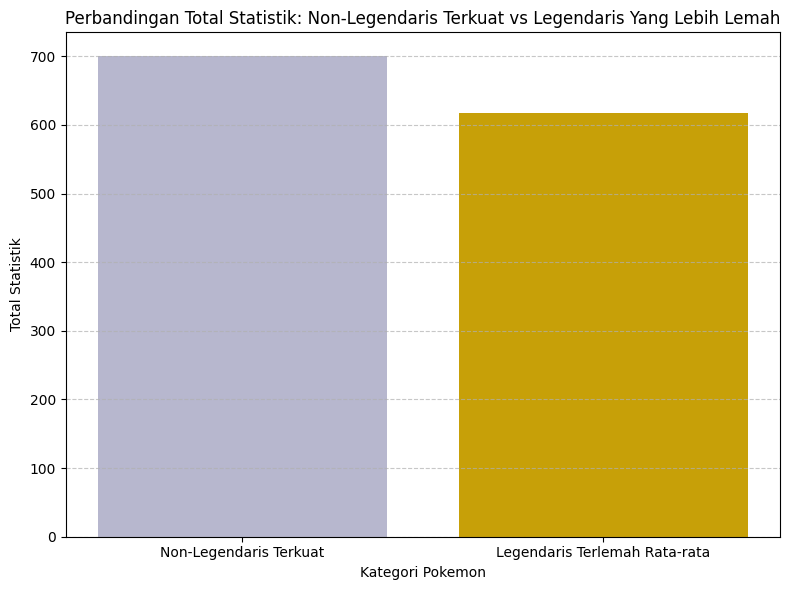

In [145]:
# Pisahkan data Pokemon Legendaris dan Non-Legendaris
legendaris = data[data['Legendary'] == True]
non_legendaris = data[data['Legendary'] == False]

# Temukan Pokemon Non-Legendaris Terkuat
non_legendaris_terkuat = non_legendaris.sort_values(by='Total', ascending=False).head(1)

# Temukan Pokemon Legendaris yang Lebih Lemah
legendaris_lemah = legendaris[legendaris['Total'] < non_legendaris_terkuat['Total'].values[0]]

# Tampilkan informasi Pokemon
print("\n**Informasi Pokemon Non-Legendaris Terkuat:**")
# Use 'Type 1' instead of 'Type' if it is the correct column name
print(non_legendaris_terkuat[['Name', 'Type 1', 'Total']].to_string(index=False))

print("\n**Informasi Pokemon Legendaris yang Lebih Lemah:**")
# Use 'Type 1' instead of 'Type' if it is the correct column name
print(legendaris_lemah[['Name', 'Type 1', 'Total']].to_string(index=False))

# Buat bar chart untuk membandingkan total statistik
plt.figure(figsize=(8, 6))
plt.bar(
    ['Non-Legendaris Terkuat', 'Legendaris Terlemah Rata-rata'],
    [non_legendaris_terkuat['Total'].values[0], legendaris_lemah['Total'].mean()],
    color=['#B7B7CE', '#c7a008']
)
plt.xlabel('Kategori Pokemon')
plt.ylabel('Total Statistik')
plt.title('Perbandingan Total Statistik: Non-Legendaris Terkuat vs Legendaris Yang Lebih Lemah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Daftar Pokemon dengan HP Paling Tebal di Setiap Generasi**

Generasi: 1, Nama: Chansey, HP: 250

Generasi: 2, Nama: Blissey, HP: 255

Generasi: 3, Nama: Wailord, HP: 170

Generasi: 4, Nama: Drifblim, HP: 150

Generasi: 5, Nama: Alomomola, HP: 165

Generasi: 6, Nama: Xerneas, HP: 126



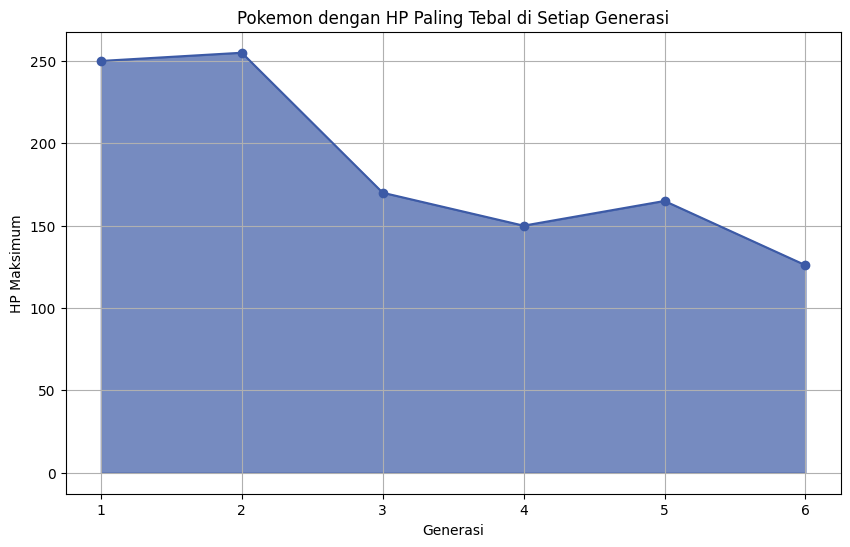

In [174]:
# Temukan Pokemon dengan HP paling banyak di tiap generasi
pokemon_hp_max_per_gen = data.groupby('Generation')['HP'].idxmax() # Get the indices of Pokemon with max HP

# Dapatkan nama Pokemon yang sesuai dengan indeks tersebut
pokemon_hp_max_per_gen = data.loc[pokemon_hp_max_per_gen, ['Name', 'Generation', 'HP']]

# Urutkan data berdasarkan generasi
pokemon_hp_max_per_gen = pokemon_hp_max_per_gen.sort_values(by='Generation')

# Tampilkan informasi Pokemon
print("\n**Daftar Pokemon dengan HP Paling Tebal di Setiap Generasi**\n")
for index, row in pokemon_hp_max_per_gen.iterrows():
    print(f"Generasi: {row['Generation']}, Nama: {row['Name']}, HP: {row['HP']}")
    print()

# Visualisasi Dengan Scatter Plot
plt.figure(figsize=(10, 6))
plt.fill_between(pokemon_hp_max_per_gen['Generation'], pokemon_hp_max_per_gen['HP'], color='#3c5aa6', alpha=0.7)
plt.plot(pokemon_hp_max_per_gen['Generation'], pokemon_hp_max_per_gen['HP'], marker='o', linestyle='-', color='#3c5aa6')
plt.xlabel('Generasi')
plt.ylabel('HP Maksimum')
plt.title('Pokemon dengan HP Paling Tebal di Setiap Generasi')
plt.xticks(pokemon_hp_max_per_gen['Generation'])
plt.grid(True)
plt.show()
